In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import join 
matplotlib.rcParams.update({'font.size': 18})
from sklearn.decomposition import NMF
# import cv2
# import os
# os.sys.path.append('/home/milind/anaconda3/envs/fhofer/lib/python3.5/')

# os.sys.path
# !pip install opencv-python

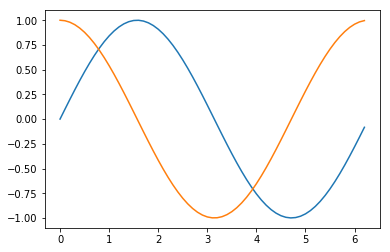

In [2]:
x = np.arange(0,2*np.pi,0.1)
sin = np.sin(x)
cos = np.cos(x)
a = [sin, cos]
for i in a:
    plt.plot(x,i)

In [3]:
import cv2
import os

In [4]:
# Frobenius norm with square root
def lstcost(A,B):
    return np.sqrt(np.sum((A-B)**2))
  
# second type of divergence  
def divcost(A,B):
    return np.sum(A*np.log(A/B))-np.sum(A)+np.sum(B)

  
def lstfind(V,r,numiter,toprint):
    n= V.shape[0]
    m= V.shape[1]
    # initial scaling copied from scikit 
    # implementation
    q= (V.mean())/r
    W= q*np.random.random((n,r))
    H= q*np.random.random((r,m))
    cost=[lstcost(V,np.dot(W,H))]
    for i in range(1,numiter+1):
        W = W*(np.dot(V,H.T))/(np.dot(W,np.dot(H,H.T)))
    # TODO: remove the hnew?
        hnew= H*(np.dot(W.T,V))/(np.dot(W.T,np.dot(W,H)))
    # W is updated before H is and the new value is used    
        H= hnew.copy()
        
        if i%toprint==0:
            cost.append(lstcost(V,np.dot(W,H)))
            print("cost after " +str(i) + " iterations: " + str(cost[-1]) )
    return (W,H,cost)
  
def divfind(V,r,numiter,toprint):
    n= V.shape[0]
    m= V.shape[1]
    q= (V.mean())/r
    q=1
    W= q*np.random.random((n,r))
    H= q*np.random.random((r,m))
    cost=[divcost(V,np.dot(W,H))]
    for i in range(1,numiter+1):
        W = W*(np.dot(V/np.dot(W,H),H.T))/(np.sum(H,axis=1,keepdims=True)).T
        H = H*(np.dot(W.T,V/np.dot(W,H)))/(np.sum(W,axis=0,keepdims=True)).T
        #wnew= W*(np.dot(V,H.T))/(np.dot(W,np.dot(H,H.T)))
        #H= hnew.copy()
        #W= wnew.copy()
        if i%toprint==0:
            cost.append(divcost(V,np.dot(W,H)))
            print("cost after " +str(i) + " iterations: " + str(cost[-1]) )
    return (W,H,cost)
  
def plotfigure(figsize,xlabel,ylabel,title,x,y=[],style="k-",graph="plot"):
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if y==[]:
        plt.plot(x,style)
    else:
        if graph=="plot":
            plt.plot(x,y,style)
        if graph== "semilogx":
            plt.semilogx(x,y,style)
        if graph== "semilogy":
            plt.semilogy(x,y,style)
        if graph== "loglog":
            plt.loglog(x,y,style)
    plt.tight_layout()
    plt.show()
    plt.close()

In [5]:
# randomly generate non negative data
n= 10
m= 100000
V= 2*np.random.random((n,m))


In [6]:
numiter=200
# number of basis vectors to be found
r=5
toprint=10

cost after 10 iterations: 133717.83888577612
cost after 20 iterations: 112457.36918442871
cost after 30 iterations: 107303.10909869871
cost after 40 iterations: 105532.15950185119
cost after 50 iterations: 104510.4202246666
cost after 60 iterations: 103745.96586986666
cost after 70 iterations: 103116.16786320694
cost after 80 iterations: 102578.79881803843
cost after 90 iterations: 102111.0897153361
cost after 100 iterations: 101700.13365286565
cost after 110 iterations: 101337.51410906971
cost after 120 iterations: 101013.54727489711
cost after 130 iterations: 100722.36902658339
cost after 140 iterations: 100459.5010770061
cost after 150 iterations: 100217.03769600426
cost after 160 iterations: 99999.67387172859
cost after 170 iterations: 99803.42690746952
cost after 180 iterations: 99624.35112669121
cost after 190 iterations: 99463.1069940431
cost after 200 iterations: 99319.11076290731


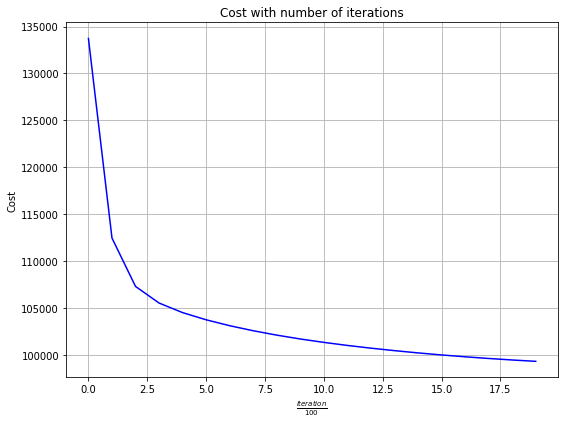

20
[517.14183526 474.25176686 463.25610433 459.41736907 457.18797059
 455.5128228  454.12810497 452.94326095 451.90948146 450.9991877
 450.19443379 449.47424237 448.82595519 448.23989353 447.6986435
 447.21286625 446.77382848 446.37282876 446.01145051 445.68848036]


In [31]:
# using implemented function
W,H,cost= divfind(V,r,numiter,toprint)
cost=cost[1:]
plotfigure((8,6),r"$\frac{iteration}{100}$", "Cost", 
           "Cost with number of iterations",x=cost,style="b-")
print(len(cost))
cost_local = np.sqrt(2*np.array(cost))
print(cost_local)

In [32]:
# using the inbuilt scikit implementation
model = NMF(n_components=5, init='random', random_state=0,solver="mu",beta_loss="kullback-leibler", verbose = True)
W = model.fit_transform(V)
H = model.components_
# the Frobenius norm after 200 iterations
print(model.reconstruction_err_ )


Epoch 10 reached after 0.231 seconds, error: 518.177520
Epoch 20 reached after 0.443 seconds, error: 476.253454
Epoch 30 reached after 0.645 seconds, error: 462.582633
Epoch 40 reached after 0.857 seconds, error: 457.429803
Epoch 50 reached after 1.060 seconds, error: 454.699224
Epoch 60 reached after 1.275 seconds, error: 452.922873
Epoch 70 reached after 1.482 seconds, error: 451.657991
Epoch 80 reached after 1.697 seconds, error: 450.716377
Epoch 90 reached after 1.905 seconds, error: 449.997398
Epoch 100 reached after 2.140 seconds, error: 449.436807
Epoch 110 reached after 2.379 seconds, error: 448.994061
Epoch 120 reached after 2.588 seconds, error: 448.638056
Epoch 130 reached after 2.801 seconds, error: 448.348012
Epoch 140 reached after 3.019 seconds, error: 448.105435
Epoch 150 reached after 3.241 seconds, error: 447.905851
Epoch 160 reached after 3.451 seconds, error: 447.737933
Epoch 170 reached after 3.661 seconds, error: 447.593796
Epoch 180 reached after 3.880 seconds, e

/home/milind/miniconda3/envs/tf/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [35]:
# frob norm
# cost_scikit = [471.363319 ,  433.213915, 421.61140, 417.640902, 415.641221,  414.338605, 413.378234,  412.625658, 411.512819, 411.092626, 410.737447, 410.434177, 410.175793,  409.953761, 409.761332, 409.593385, 409.445201,  409.314357, 409.197773, 409.1977730057483]     

# KL divergence 
cost_scikit = [518.177520, 476.253454, 462.582633, 457.429803, 454.699224, 452.922873, 451.657991, 450.716377, 449.997398, 449.436807, 448.994061, 448.638056, 448.348012, 448.105435, 447.905851, 447.737933, 447.593796, 447.469866, 447.360271, 447.264539]

In [36]:
iterat = np.arange(10,210, 10)
print(iterat)

[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200]


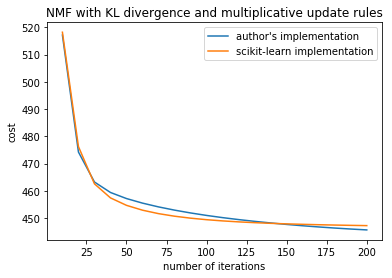

In [37]:

# plt.title("NMF with Frobenius norm and multiplicative update rules")
plt.title("NMF with KL divergence and multiplicative update rules")
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.plot(iterat, cost_local, label = "author's implementation")
plt.plot(iterat, cost_scikit, label = "scikit-learn implementation")
plt.legend()
plt.show()

cost after 10 iterations: 138586.04024900903
cost after 20 iterations: 119170.96841646906
cost after 30 iterations: 109685.43372102373
cost after 40 iterations: 105766.74727593525
cost after 50 iterations: 103970.95636942098
cost after 60 iterations: 102881.68536926096
cost after 70 iterations: 102095.59156424575
cost after 80 iterations: 101481.26618464652
cost after 90 iterations: 100991.12691764883
cost after 100 iterations: 100602.37568660965
cost after 110 iterations: 100288.95612001361
cost after 120 iterations: 100031.6478903963
cost after 130 iterations: 99817.62303902791
cost after 140 iterations: 99638.58134331333
cost after 150 iterations: 99487.27206429106
cost after 160 iterations: 99356.20938455372
cost after 170 iterations: 99238.0117136687
cost after 180 iterations: 99133.15508213919
cost after 190 iterations: 99041.29862484674
cost after 200 iterations: 98958.85341809154


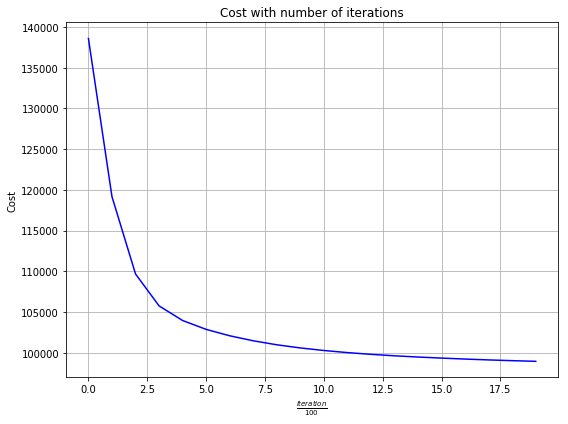

In [38]:
# NMF using the Kullback Liebler divergence
numiter=200
r=5
toprint=10
W,H,cost= divfind(V,r,numiter,toprint)
cost=cost[1:]
plotfigure((8,6),r"$\frac{iteration}{100}$", "Cost", 
           "Cost with number of iterations",x=cost,style="b-",)

In [39]:
# checking the maximum deviation 
print(np.max(abs(V-np.dot(W,H))))
# checking non-negativity
print(np.dot(W,H)[np.where(np.dot(W,H)<=0)])

2.033603542652953
[]


In [40]:
# NMF using Kullback Liebler using scikit learn
model = NMF(n_components=5, init='random', random_state=0,solver="mu",beta_loss=1)
W = model.fit_transform(V)
H = model.components_
# scikit implementation_
err= (model.reconstruction_err_ )
# modifying the obtained error to compre with 
# implementation
error= (err**2)/2
print(error)
print(np.max(abs(V-np.dot(W,H))))


100022.78392923607
2.22503514946645


/home/milind/miniconda3/envs/tf/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


# NMF on the CBCL dataset (quick and dirty test)

In [45]:
# CBCL dataset faces
path_faces = "/home/milind/projects/source_separation/sourcesep/face/"

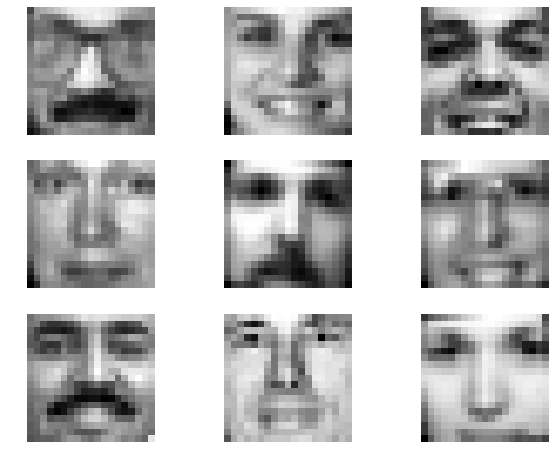

In [53]:
V = []
count = 1
plt.figure(figsize = (10,8))
for images in listdir(path_faces):
# images = listdir(path_faces)[0]
    image = os.path.join(path_faces,images)
    img = cv2.imread(image,0)
    if count < 10:
        plt.subplot(3,3,count)
        plt.axis("off")
        plt.imshow(img, cmap = "gray")
        count +=1 
        
    vi = np.array(img).flatten()
    V.append(vi)
#     plt.figure()
#     plt.imshow(img, cmap = "gray")
plt.show()
# print(np.shape())

In [54]:
V = np.array(V)
V = V.T
print(np.shape(V))

(361, 2429)


In [55]:
# refer paper
r = 49 

In [65]:
# using the inbuilt scikit implementation
model = NMF(n_components=r, init='random', random_state=0,solver="mu",beta_loss=1,max_iter=50000)
W = model.fit_transform(V)
H = model.components_
# the Frobenius norm after 200 iterations
print(model.reconstruction_err_ )

1143.2657271264895


In [66]:
print(np.shape(W))

(361, 49)


## Comparing actual and reconstructed image

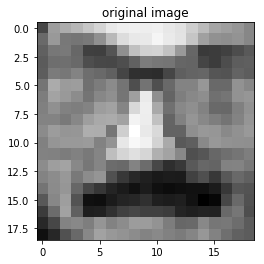

In [58]:
image1 = V[:,0].reshape(19,19)
plt.figure()
plt.imshow(image1,cmap="gray")
plt.title("original image")
plt.show()

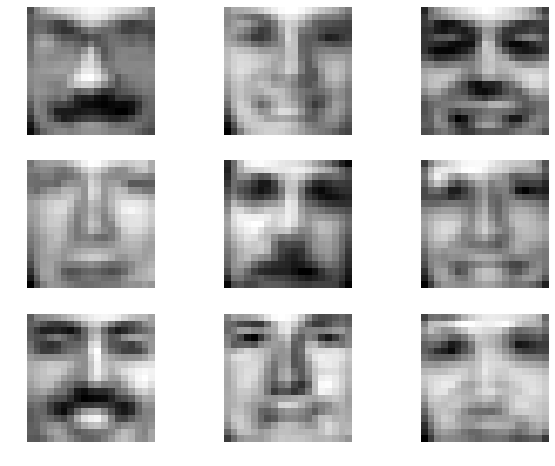

In [67]:
image1_reco = np.dot(W,H[:,0]).reshape(19,19)

plt.figure(figsize = (10,8))
for i in range(0,9):
    image1_reco = np.dot(W,H[:,i]).reshape(19,19)
    plt.subplot(3,3,i+1)
    plt.imshow(image1_reco, cmap = "gray")
# plt.imshow(image1_reco,cmap="gray")
# plt.title("reconstructed image")
    plt.axis("off")
plt.show()

## Some of the features learnt 
* The reshaped columns of the W matrix
* Display the representational power of NMF

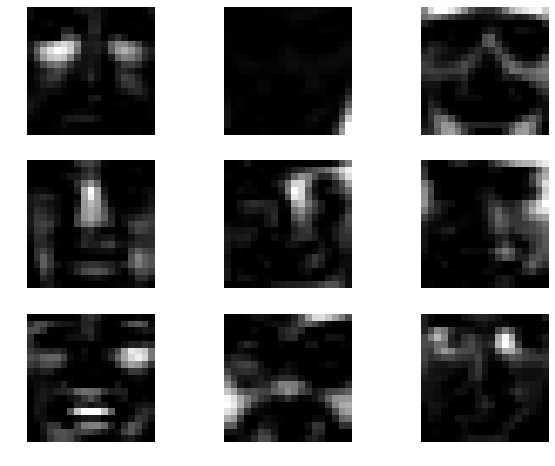

In [71]:
plt.figure(figsize = (10,8))
for i in range(0,9):
    feature = W[:,i].reshape(19,19)
    plt.subplot(3,3,i+1)
    plt.imshow(feature,cmap="gray")
    plt.axis("off")
plt.show()